In [1]:
import sys
!{sys.executable} -m pip install pandas matplotlib 

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#  Comparing fine-tuning Llama 3.2 3B with LoRA and QLoRA 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def dataFromCSV(file_name):
    df = pd.read_csv(file_name)
    data = df.iloc[1].to_frame()
    # Clean data
    data = data.replace('Not Available', 0)
    data.fillna(0)
    data = data.replace(np.nan, 0, regex=True)
    index = ['Model', 'BLEU', 'ROUGE_1_r', 'ROUGE_1_p', 'ROUGE_1_f', 'ROUGE_2_r', 'ROUGE_2_p', 'ROUGE_2_f', 'ROUGE_L_r', 'ROUGE_L_p', 'ROUGE_L_f', 'BERT_R', 'BERT_P', 'BERT_F1', 'Fine-Tuning_Time']
    data.index = index
    data = data.drop(index=["Model", "Fine-Tuning_Time"])
    # print(f"data = {data}")
    return data

def compare3CSV(file0, file1, file2, plot_title = "Comparison of Base, LoRA, and QLoRA Fine-Tuning Results"):
    # Read the CSV files
    metrics0 =  dataFromCSV(file0)
    metrics1 =  dataFromCSV(file1)
    metrics2 =  dataFromCSV(file2)
    # metrics12  =  metrics1.join(metrics2, lsuffix='LoRA', rsuffix='QLoRA')
    metrics0.columns = ['Base']
    metrics1.columns = ['LoRA']
    metrics2.columns = ['QLoRA']

    metrics123 = metrics0.join(metrics1).join(metrics2)
    metrics123 = metrics123.reset_index()
    metrics123 = metrics123.rename(columns={"index": "Metric"})

    for col in ['Base', 'LoRA', 'QLoRA']:
        metrics123[col] = pd.to_numeric(metrics123[col], errors='coerce')

    plt.figure(figsize=(22, 8))
    x_range = range(len(metrics123))
    bar_width = 0.25

    bars_base = plt.bar([i - bar_width for i in x_range], metrics123['Base'], width=bar_width, label='Base', color='green', alpha=0.7)
    bars_lora = plt.bar(x_range, metrics123['LoRA'], width=bar_width, label='LoRA', color='blue', alpha=0.7)
    bars_qlora = plt.bar([i + bar_width for i in x_range], metrics123['QLoRA'], width=bar_width, label='QLoRA', color='orange', alpha=0.7)

    for bar in bars_base:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')
    for bar in bars_lora:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')
    for bar in bars_qlora:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

    plt.xlabel('Metrics', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.title(plot_title, fontsize=14)
    plt.xticks(x_range, metrics123['Metric'], rotation=45, fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()
    # Show the plot
    plt.show()

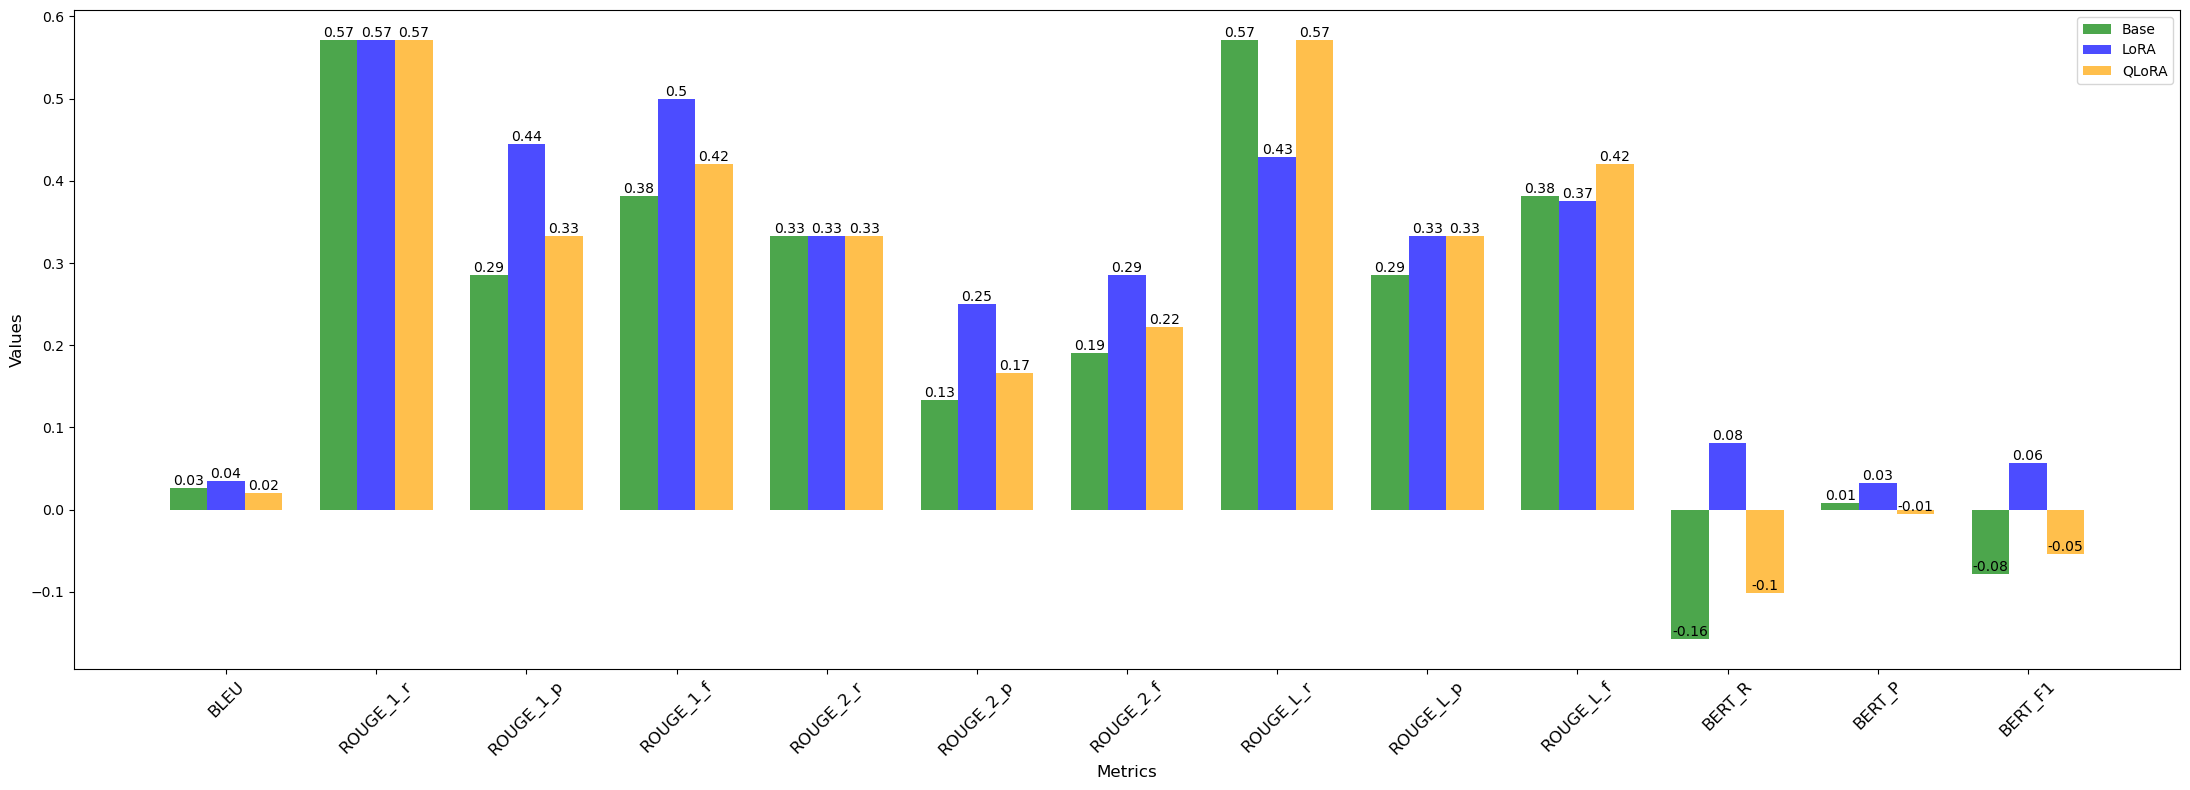

In [3]:
# compare3CSV("../../experiments/Metrics_LM32_1B_Before.csv", "../../experiments/Metrics_LM32_1B_QA_LoRA.csv", "../../experiments/Metrics_LM32_1B_QA_QLoRA.csv", "Comparison of LLama 1B Base, LoRA Fine-Tuning, and QLoRA Fine-Tuning Results")
compare3CSV("../../experiments/Metrics_LM32_1B_Before.csv", "../../experiments/Metrics_LM32_1B_QA_LoRA.csv", "../../experiments/Metrics_LM32_1B_QA_QLoRA.csv", "")

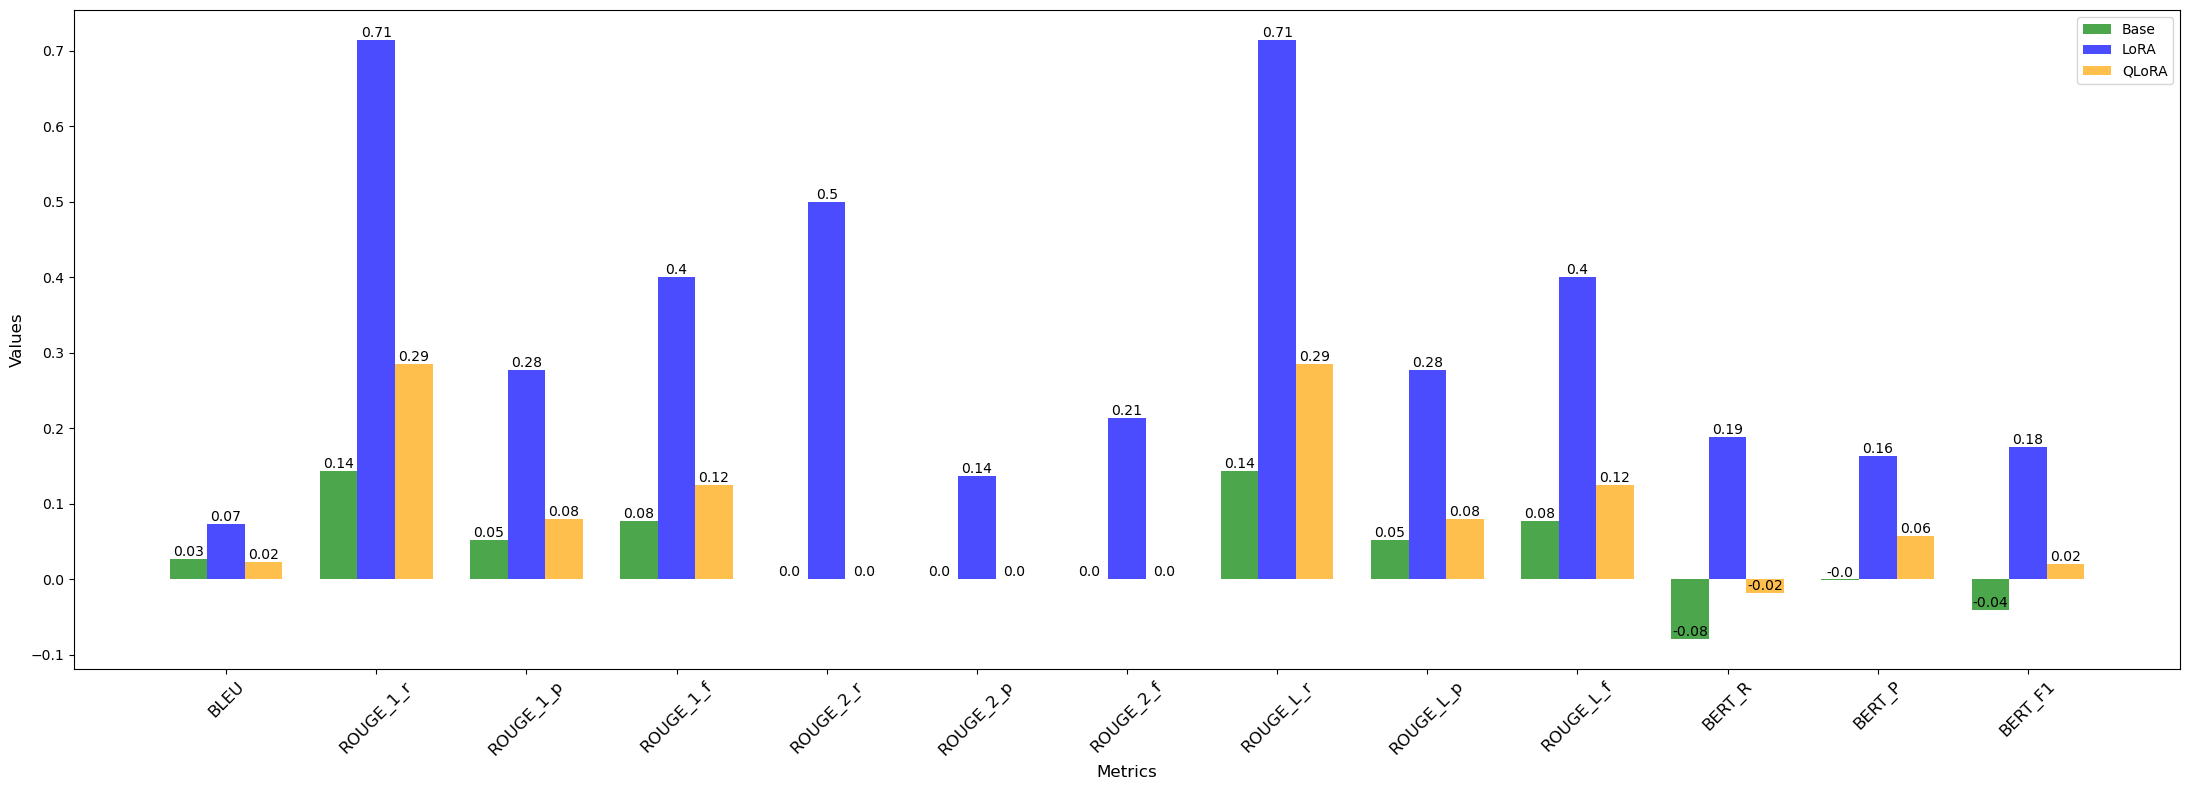

In [4]:
# compare3CSV("../../experiments/Metrics_LM32_3B_Before.csv", "../../experiments/Metrics_LM32_3B_QA_LoRA.csv", "../../experiments/Metrics_LM32_3B_QA_QLoRA.csv", "Comparison of LLama 3B Base, LoRA Fine-Tuning, and QLoRA Fine-Tuning Results")
compare3CSV("../../experiments/Metrics_LM32_3B_Before.csv", "../../experiments/Metrics_LM32_3B_QA_LoRA.csv", "../../experiments/Metrics_LM32_3B_QA_QLoRA.csv", "")



In [5]:
def get_avg_score_from_csv(file_name):
    f = open(file_name, 'r')  # Open file 
    lines = f.readlines()  # Read all lines
    last_line = lines[-1].strip()
    if "Av" in last_line:
        words = last_line.split(",")
        if len(words)<2:  
            return 0.00  
        word = words[-1].strip()
        try:
            score = float(word)  # Convert to float
            return score  # Return the score
        except Exception as e:
            print(f"An error occurred: {e}")
            return 0.00
    else:
        return 0.00
    f.close()  # Close file

In [6]:
score_1B_base = get_avg_score_from_csv("../../experiments/Results_LM32_1B_Before_Scores_1.csv")
score_1B_lora = get_avg_score_from_csv("../../experiments/Results_LM32_1B_QA_LoRA_Scores_1.csv")   
score_1B_qlora = get_avg_score_from_csv("../../experiments/Results_LM32_1B_QA_QLoRA_Scores_1.csv")  

score_3B_base = get_avg_score_from_csv("../../experiments/Results_LM32_3B_Before_Scores_1.csv")
score_3B_lora = get_avg_score_from_csv("../../experiments/Results_LM32_3B_QA_LoRA_Scores_1.csv")   
score_3B_qlora = get_avg_score_from_csv("../../experiments/Results_LM32_3B_QA_QLoRA_Scores_1.csv")   



In [7]:
print(f"1B Base Score: {score_1B_base}, LoRA Score: {score_1B_lora}, QLoRA Score: {score_1B_qlora}")
print(f"3B Base Score: {score_3B_base}, LoRA Score: {score_3B_lora}, QLoRA Score: {score_3B_qlora}")

1B Base Score: 0.23529411764705882, LoRA Score: 0.47058823529411764, QLoRA Score: 0.17647058823529413
3B Base Score: 0.47058823529411764, LoRA Score: 3.7058823529411766, QLoRA Score: 1.9411764705882353


In [8]:
def compare6Scores(A0, A1, A2, B0, B1, B2, title):
    # Group values
    A_values = [A0, A1, A2]
    B_values = [B0, B1, B2]

    # Define x positions manually
    x_A = [0, 1, 2]       # A group: close together
    x_B = [4, 5, 6]       # B group: close together but shifted (gap between 2 and 4)

    # Create the plot
    # plt.figure(figsize=(10, 6))

    # Plot bars
    bars_A = plt.bar(x_A, A_values, width=0.8, label='Llama 3.2 1B', color='blue', alpha=0.7)
    bars_B = plt.bar(x_B, B_values, width=0.8, label='Llama 3.2 3B', color='orange', alpha=0.7)

    # Add value labels
    for bar in bars_A + bars_B:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
                f'{bar.get_height():.2f}', ha='center', va='bottom')

    # Set x-ticks and labels
    plt.xticks(x_A + x_B, ['Base', 'LoRA', 'QLoRA', 'Base', 'LoRA', 'QLoRA'])

    # Labels and title
    plt.xlabel('Foundational Models (Bases) and Fine-Tuning Methods')
    plt.ylabel('Scores')
    plt.title(title)

    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


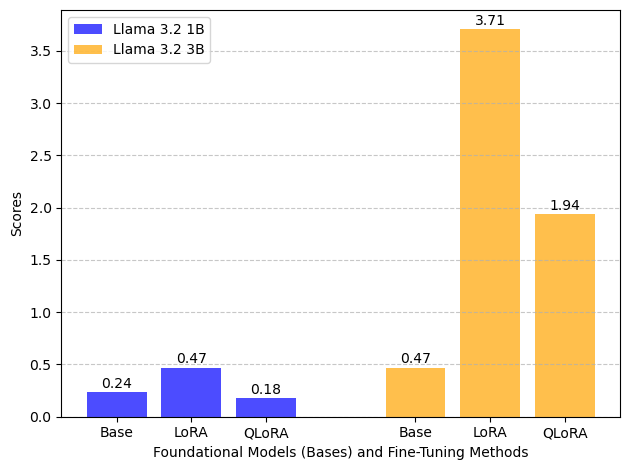

In [9]:
# compare6Scores(score_1B_base, score_1B_lora, score_1B_qlora, score_3B_base, score_3B_lora, score_3B_qlora, "Comparison of Base, LoRA/QLoRA Fine-Tuning Scores of Llama 3.2 1B (left) and 3B (right) Models")
compare6Scores(score_1B_base, score_1B_lora, score_1B_qlora, score_3B_base, score_3B_lora, score_3B_qlora, "")

